<a href="https://colab.research.google.com/github/Cstan1987stat/health-survey-cluster-analysis/blob/main/famd_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
# Loading in the adult22 csv file.
df <- read.csv("https://raw.githubusercontent.com/Cstan1987stat/health-survey-cluster-analysis/refs/heads/main/data/adult22_transformed_n.csv")

# Extracting the number of rows from df
rows <- dim(df)[1]
# Extracting the number of columns from df
columns <- dim(df)[2]
# Outputing the number of rows and columns
cat('There are', rows,'rows and', columns,'columns in the data.\n')
# Outputing horizontal line for separation purposes
cat('---------------------------------------------------------------------------------------------------\n')
# Outputing blank line
cat('\n')
# Printing the first 6 rows of the data
print(head(df))

There are 20361 rows and 14 columns in the data.
---------------------------------------------------------------------------------------------------

         Age    Sex Cancer Coronary_heart_disease Depression Smoked_100_cig
1  0.6829768   Male    Yes                    Yes         No            Yes
2 -0.8712716 Female     No                     No         No             No
3  1.1434949 Female     No                     No         No             No
4  1.8342719 Female     No                     No         No             No
5 -1.2166601 Female     No                     No         No            Yes
6  1.6615777 Female    Yes                     No         No             No
     Education Region     Anxiety     Height      Weight Sleep_hours
1         Bach  South Few times Y  1.8364130  1.40754813   0.6748554
2         Bach  South     Monthly  0.5448253  0.97779707   1.4153162
3 Some College  South       Never -0.7467624  1.53394551   0.6748554
4   Assoc Tech  South Few times Y -0.23012

In [ ]:
# Install and loading the FactoMineR package
install.packages('FactoMineR')
library(FactoMineR)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rbibutils’, ‘cowplot’, ‘Deriv’, ‘microbenchmark’, ‘Rdpack’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘reformulas’, ‘RcppEigen’, ‘lazyeval’, ‘carData’, ‘abind’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘crosstalk’, ‘estimability’, ‘numDeriv’, ‘mvtnorm’, ‘car’, ‘DT’, ‘ellipse’, ‘emmeans’, ‘flashClust’, ‘leaps’, ‘multcompView’, ‘scatterplot3d’, ‘ggrepel’




The FactoMineR package contains the 'FAMD' function, which we will use to reduce the dimensionality of our data. FAMD stands for Factor Analysis for Mixed Data and can be thought of as a combination of PCA and MCA:

* PCA (Principal Components Analysis) -- A technique for reducing the number of continuous features by combining the original continuous variables in a way that retains as much variance as possible.
* MCA (Multi Correspondence Analysis) -- A technique similar in thought to PCA, but designed for categorical data.

FAMD blends these approaches together.

However, the dimensionality of the dataset will first increase. This occurs because the MCA component of FAMD one-hot encodes the categorical variables (while dropping the first category of each). These encoded columns are then treated similarly to continuous features in PCA, with specific weighting applied.

In [18]:
# Setting a seed for reproducibility
set.seed(23)
# Running FAMD on the df data frame, specifying no graph, and 30 components to be kept.
f <- FAMD(df, graph = FALSE, ncp=30)

In [19]:
# Outputing how many componenets were created from FAMD
cat('There are',dim(f$eig)[1], 'components that were created from the FAMD.\n')

There are 29 components that were created from the FAMD.


In [26]:
# Creating inital data frame to hold component, variance, and total variance
scree <- data.frame(C = numeric(), Per_Vari = numeric(), Tot_Vari = numeric())
# Looping from 1 through 29 in 1 unit jumps
for (n_comp in seq(1,29,1)){
  # Extracting the variance for the given component
  variab <- f$eig[n_comp,2]
  # Extracting the total variance up until the given component
  tot_var <- f$eig[n_comp,3]
  # Creating data frame with given component, variance, and total variance
  new_row <- data.frame(C = n_comp, Per_Vari = variab, Tot_Vari = tot_var)
  # Adding the new_row to the scree data frame through row binding
  scree <- rbind(scree, new_row)
}

In [21]:
# Loading in ggplot2
library(ggplot2)

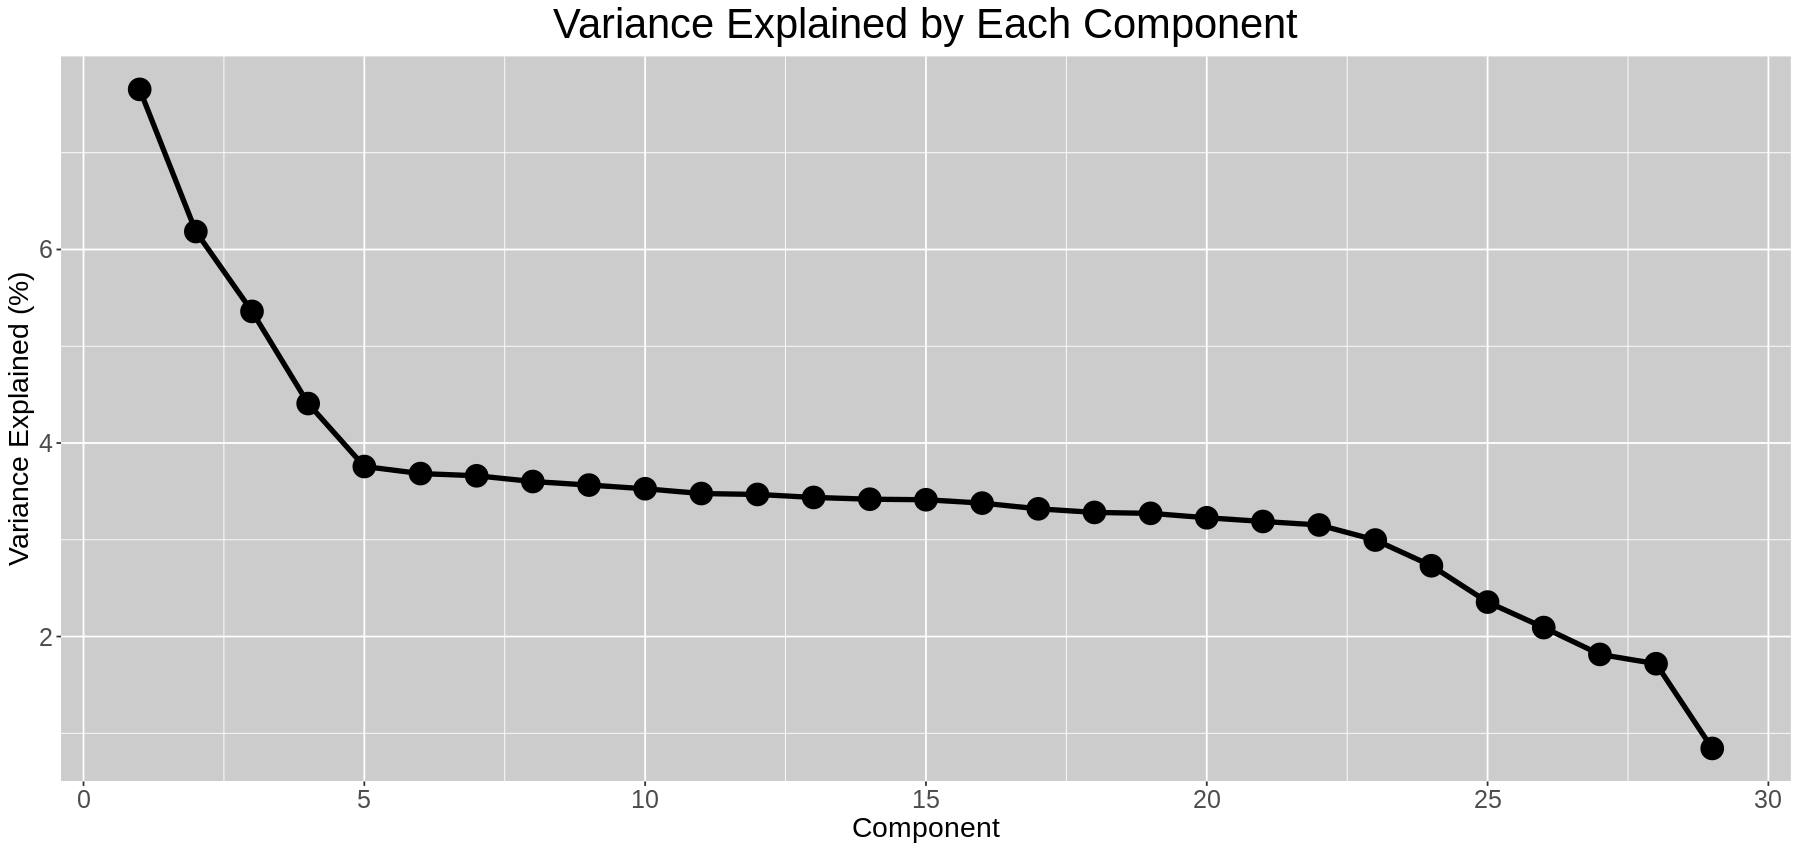

In [22]:
# Changing the dimensions of the plot
options(repr.plot.width = 15, repr.plot.height = 7.1)
# Creating a line plot
ggplot(scree, aes(x=C, y = Per_Vari)) +
  # Adding the line
  geom_line(linewidth=1.5, color='black') +
  # Adding the points
  geom_point(size=6) +
  # Changing the scale of the x axis.
  scale_x_continuous(breaks=seq(0,30,5), labels = seq(0,30,5)) +
  # Changing the title and axis labels
  labs(title = 'Variance Explained by Each Component',
       x = 'Component', y = "Variance Explained (%)") +
  # Changing the size of the text and color of the panel portion of the plot
  theme(axis.text.x = element_text(size=15),
        axis.text.y = element_text(size=15),
        axis.title.x = element_text(size=17),
        axis.title.y = element_text(size=17),
        plot.title = element_text(size=25, hjust = 0.5),
        panel.background = element_rect(fill = "gray80"),
        plot.subtitle = element_text(size=12))


The first component explains roughly 7.5% of the variance in the initial data. The variance explained per component decreases sharply until the fifth component (around 3.8% variance), then declines more gradually until the twenty-second component (around 3.1% variance). After that, the explained variance drops more sharply again, eventually reaching about 0.9%.

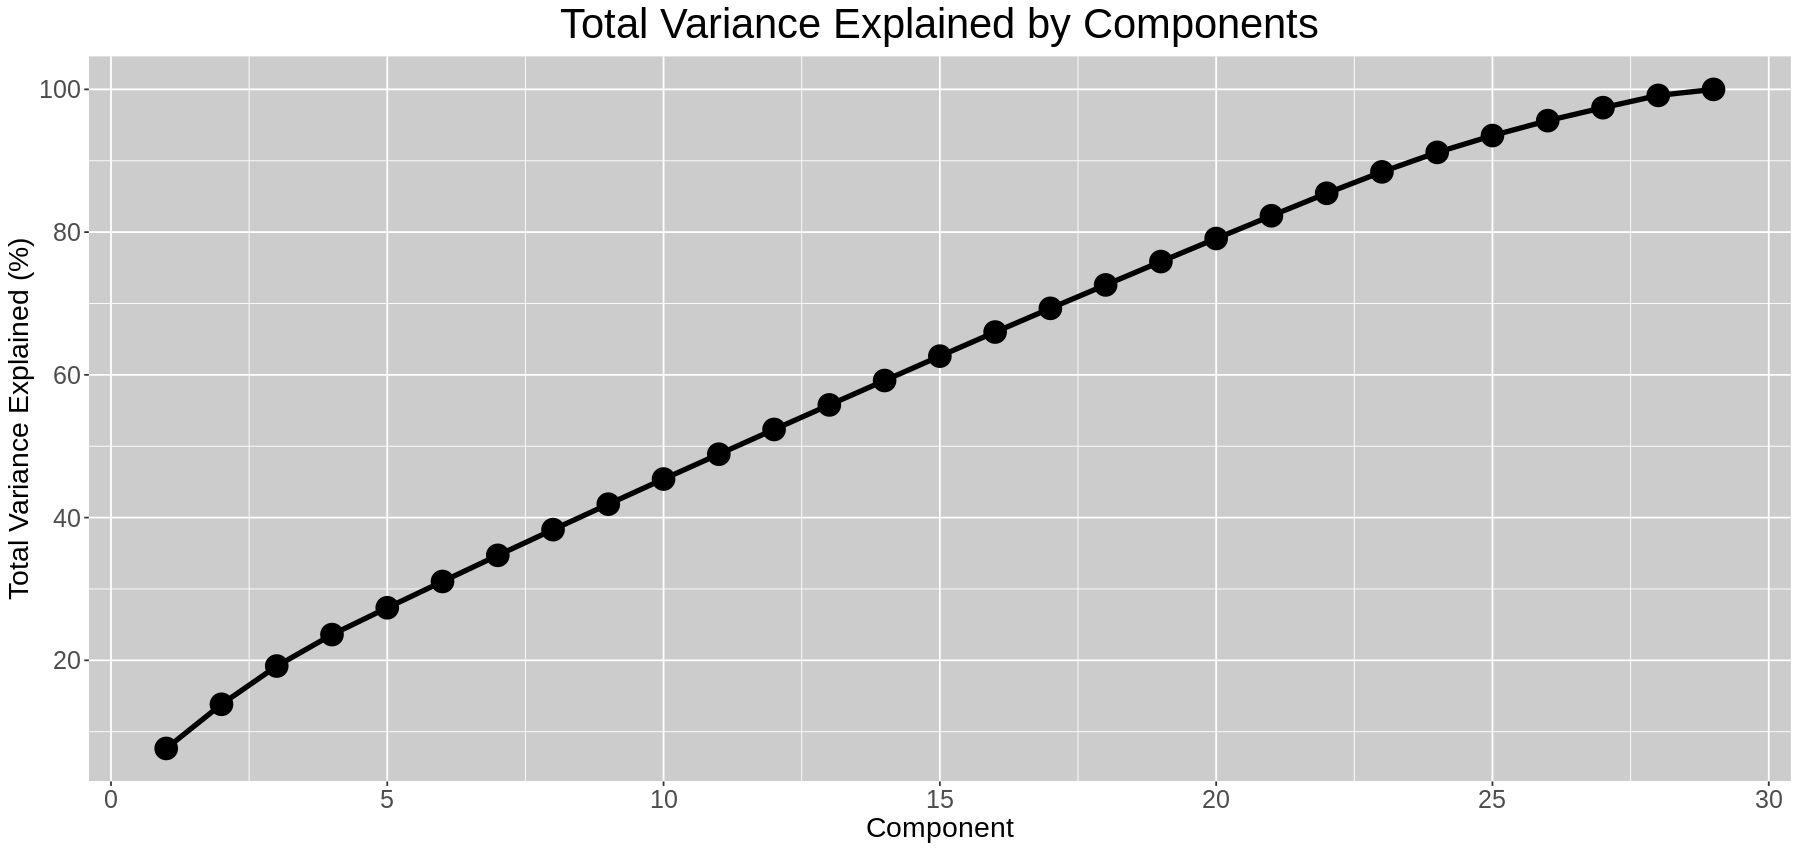

In [23]:
# Creating a line plot
ggplot(scree, aes(x=C, y = Tot_Vari)) +
  # Adding the line
  geom_line(linewidth=1.5, color='black') +
  # Adding the points
  geom_point(size=6) +
  # Changing the scale and the x and y axis
  scale_x_continuous(breaks=seq(0,30,5), labels = seq(0,30,5)) +
  scale_y_continuous(breaks=seq(0,100,20)) +
  # Adding custom title and axis labels
  labs(title = 'Total Variance Explained by Components',
       x = 'Component', y = "Total Variance Explained (%)") +
  # Adjusting the font size of text and background of the panel portion of the plot
  theme(axis.text.x = element_text(size=15),
        axis.text.y = element_text(size=15),
        axis.title.x = element_text(size=17),
        axis.title.y = element_text(size=17),
        plot.title = element_text(size=25, hjust = 0.5),
        panel.background = element_rect(fill = "gray80"),
        plot.subtitle = element_text(size=12))

This graph shows the total variance explained by the principal components. For the nth component, it represents the total variance explained by the first n components combined. In this case, the first three components explain approximately 19.5% of the variance in the original data, while the first twenty components account for about 79% of the total variance.

In [24]:
# Save the coordinates as a data frame.
df <- data.frame(f$ind$coord)

In [25]:
# Exporting df as famd_coord
write.csv(df, 'famd_coord.csv', row.names = FALSE)